In [1]:
import numpy as np

from giotto.mapper import OneDimensionalCover, CubicalCover

from matplotlib import pyplot as plt

In [2]:
n_samples = 100
n_intervals = 20
overlap_frac = 0.15

In [3]:
X = np.random.random(n_samples)
# X = np.concatenate([X, X[[-2]]])
# print(len(np.unique(X)))

In [4]:
kind = 'uniform'
kwargs = {'kind': 'uniform', 'n_intervals': n_intervals, 'overlap_frac': overlap_frac}

In [5]:
one_d_uniform = OneDimensionalCover(**kwargs)
one_d_uniform.fit(X)
one_d_uniform.fitted_intervals()

[(-inf, 0.08603069778519118),
 (0.07763584674135855, 0.1336015203669093),
 (0.1252066693230767, 0.18117234294862747),
 (0.17277749190479486, 0.22874316553034563),
 (0.220348314486513, 0.27631398811206376),
 (0.2679191370682311, 0.3238848106937819),
 (0.3154899596499493, 0.3714556332755001),
 (0.36306078223166743, 0.4190264558572182),
 (0.41063160481338556, 0.46659727843893634),
 (0.4582024273951037, 0.5141681010206545),
 (0.5057732499768218, 0.5617389236023725),
 (0.55334407255854, 0.6093097461840907),
 (0.6009148951402582, 0.6568805687658089),
 (0.6484857177219763, 0.704451391347527),
 (0.6960565403036945, 0.7520222139292452),
 (0.7436273628854125, 0.7995930365109633),
 (0.7911981854671307, 0.8471638590926814),
 (0.8387690080488489, 0.8947346816743996),
 (0.886339830630567, 0.9423055042561177),
 (0.9339106532122852, inf)]

In [6]:
overlap = (one_d_uniform.right_limits_[:-1] - one_d_uniform.left_limits_[1:])[0]

In [7]:
length = one_d_uniform.right_limits_[1] - one_d_uniform.left_limits_[1]

In [8]:
overlap/length

0.15000000000000024

In [9]:
Xt = one_d_uniform.transform(X)
np.array_equal(Xt, OneDimensionalCover(**kwargs).fit_transform(X))

True

In [10]:
kwargs['kind'] = 'balanced'

one_d_balanced = OneDimensionalCover(**kwargs)
one_d_balanced.fit(X)
one_d_balanced.fitted_intervals()

[(-inf, 0.0543155172021722),
 (0.0520833334217784, 0.14038841825223847),
 (0.09673871965751446, 0.20958316958222278),
 (0.1659762964553333, 0.2688300103853465),
 (0.25798582236655865, 0.3035549339054695),
 (0.2846390084554944, 0.35478646042082695),
 (0.3407300542122954, 0.3929097939442763),
 (0.38054490208921243, 0.4519793565850829),
 (0.43910052491932583, 0.49239151157664807),
 (0.48829614317981884, 0.5508677888155123),
 (0.5479776705360854, 0.6178155415994524),
 (0.6131046913551913, 0.6823535043745068),
 (0.6690532883635657, 0.7444534580257602),
 (0.7096187905968698, 0.7917725707958202),
 (0.7815688425858366, 0.8248076479812801),
 (0.8218697531378094, 0.8477845757311394),
 (0.8403563617317884, 0.9019705737952136),
 (0.8800044946867189, 0.9307772316163265),
 (0.9127169643858987, 0.9797068488581224),
 (0.9750759316899386, inf)]

In [11]:
Xt = one_d_balanced.transform(X)
np.array_equal(Xt, OneDimensionalCover(**kwargs).fit_transform(X))

True

The folloting NotFittedError is desirable

In [12]:
one_d_balanced = OneDimensionalCover(**kwargs)
one_d_balanced.fit_transform(X)
one_d_balanced.fitted_intervals()

NotFittedError: When the cover is balanced and n_intervals > 1, the left and right limits of the cover intervals are not explicitly calculated during 'fit_transform'. Please call 'fit' explicitly on the same data before using this method.

In [13]:
one_d_balanced.fit(X)

OneDimensionalCover(kind='balanced', n_intervals=20, overlap_frac=0.15)

In [14]:
one_d_balanced.fitted_intervals()

[(-inf, 0.0543155172021722),
 (0.0520833334217784, 0.14038841825223847),
 (0.09673871965751446, 0.20958316958222278),
 (0.1659762964553333, 0.2688300103853465),
 (0.25798582236655865, 0.3035549339054695),
 (0.2846390084554944, 0.35478646042082695),
 (0.3407300542122954, 0.3929097939442763),
 (0.38054490208921243, 0.4519793565850829),
 (0.43910052491932583, 0.49239151157664807),
 (0.48829614317981884, 0.5508677888155123),
 (0.5479776705360854, 0.6178155415994524),
 (0.6131046913551913, 0.6823535043745068),
 (0.6690532883635657, 0.7444534580257602),
 (0.7096187905968698, 0.7917725707958202),
 (0.7815688425858366, 0.8248076479812801),
 (0.8218697531378094, 0.8477845757311394),
 (0.8403563617317884, 0.9019705737952136),
 (0.8800044946867189, 0.9307772316163265),
 (0.9127169643858987, 0.9797068488581224),
 (0.9750759316899386, inf)]

In [15]:
for mask in Xt.T:
    print(mask.sum())

6
6
6
6
6
6
6
6
5
5
5
5
6
6
6
6
6
6
6
6


In [16]:
one_d_balanced._left_limits

array([-0.5       ,  4.45626822,  9.41253644, 14.36880466, 19.32507289,
       24.28134111, 29.23760933, 34.19387755, 39.15014577, 44.10641399,
       49.06268222, 54.01895044, 58.97521866, 63.93148688, 68.8877551 ,
       73.84402332, 78.80029155, 83.75655977, 88.71282799, 93.66909621])

In [17]:
one_d_balanced._right_limits

array([ 5.33090379, 10.28717201, 15.24344023, 20.19970845, 25.15597668,
       30.1122449 , 35.06851312, 40.02478134, 44.98104956, 49.93731778,
       54.89358601, 59.84985423, 64.80612245, 69.76239067, 74.71865889,
       79.67492711, 84.63119534, 89.58746356, 94.54373178, 99.5       ])

In [18]:
diffs = one_d_balanced._right_limits - one_d_balanced._left_limits
diffs

array([5.83090379, 5.83090379, 5.83090379, 5.83090379, 5.83090379,
       5.83090379, 5.83090379, 5.83090379, 5.83090379, 5.83090379,
       5.83090379, 5.83090379, 5.83090379, 5.83090379, 5.83090379,
       5.83090379, 5.83090379, 5.83090379, 5.83090379, 5.83090379])

In [19]:
overlap = one_d_balanced._right_limits[:-1] - one_d_balanced._left_limits[1:]

In [20]:
overlap[0] / diffs[0]

0.15000000000000002

In [21]:
X = np.random.random((n_samples, 2))
kwargs['kind'] = 'uniform'
cubical_uniform = CubicalCover(**kwargs)

In [22]:
cubical_uniform.fit(X)

CubicalCover(kind='uniform', n_intervals=20, overlap_frac=0.15)

In [23]:
Xt = cubical_uniform.transform(X)

In [24]:
np.array_equal(Xt, CubicalCover(**kwargs).fit_transform(X))

True

In [35]:
kwargs['kind'] = 'balanced'
cubical_balanced = CubicalCover(**kwargs)

In [36]:
cubical_balanced.fit(X)

CubicalCover(kind='balanced', n_intervals=20, overlap_frac=0.15)

In [37]:
Xt = cubical_balanced.transform(X)

In [38]:
np.array_equal(Xt, CubicalCover(**kwargs).fit_transform(X))

True

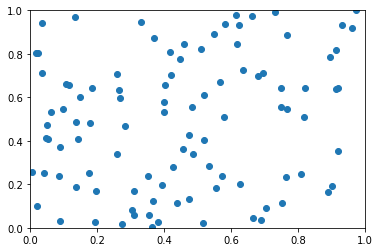

In [39]:
plt.axis([0, 1, 0, 1])
plt.scatter(X[:, 0], X[:, 1]);

In [40]:
k = -1

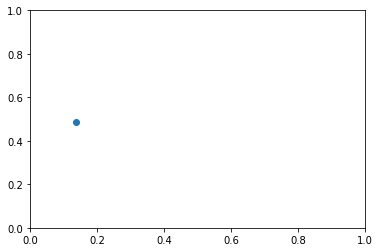

In [57]:
k += 1
X_cover = X[Xt[:,k]]
plt.axis([0, 1, 0, 1])
plt.scatter(X_cover[:, 0], X_cover[:, 1]);